<a href="https://colab.research.google.com/github/Priyanka-Gundu/Portfolio/blob/main/AirBnb_Listing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Profile & QA the data

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Load the csv file

In [3]:
import pandas as pd
file_path = '/content/drive/My Drive/Python Files/Listings.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

Convert host_since column data type from object to datetime format

In [4]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

Display the first few rows

In [5]:
df.head(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


Filtering rows where city is 'Paris' and keeping specified columns

In [6]:
paris_listings = df[df['city'] == 'Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

Displaying the first few rows of the filtered data

In [7]:
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


Checking for any missing values

In [8]:
missing_values = paris_listings.isnull().sum()
print(missing_values)

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64


Calculate the minimum, maximum, and average for each numeric field

In [9]:
paris_listings.describe(include=[float, int])

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [10]:
paris_listings.query("price==0 & accommodates==0").count()

,0
host_since,54
neighbourhood,54
city,54
accommodates,54
price,54


# Preparing the data for visualization

In [11]:
# Grouping Paris listings by 'neighbourhood' and calculating mean price (sorted low to high)
paris_listings_neighbourhood =  (paris_listings
  .groupby("neighbourhood")
  .agg({"price":"mean"})
  .sort_values("price"))

# Displaying the result
print(paris_listings_neighbourhood)

                          price
neighbourhood                  
Menilmontant          74.942257
Buttes-Chaumont       82.690182
Buttes-Montmartre     87.209479
Reuilly               89.058402
Popincourt            90.559459
Gobelins              98.110184
Observatoire         101.866801
Batignolles-Monceau  102.612702
Enclos-St-Laurent    102.967156
Vaugirard            106.831330
Opera                119.038644
Pantheon             122.662150
Temple               138.446823
Hotel-de-Ville       144.472110
Bourse               149.496801
Luxembourg           155.638639
Palais-Bourbon       156.856578
Passy                161.144635
Louvre               175.379972
Elysee               210.536765


In [12]:
# Filter Paris listings to the most expensive neighborhood, group by accommodations, and calculate mean price sorted low to high

Paris_listing_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values("price")
)

print(Paris_listing_accommodates)

                   price
accommodates            
0               0.000000
1              79.522222
3             152.828767
2             155.103352
4             212.096070
5             328.817073
6             355.508571
8             405.518519
7             411.538462
9             440.272727
10            500.857143
12            529.625000
16            800.000000
11            805.000000
13            842.500000
14            971.000000


In [27]:
# Group Paris listings by 'host_since' year, calculating average price and count of new hosts
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")     # Sets 'host_since' as the index (must be datetime format)
    .resample("YE")               # Groups data by year (end of each year)
    .agg({
        "price": "mean",         # Calculates the average price for each year
        "neighbourhood": "count" # Counts the number of listings (new hosts) for each year
    })
)

print(paris_listings_over_time)

                 price  neighbourhood
host_since                           
2008-12-31   77.750000              4
2009-12-31  159.641509            106
2010-12-31  125.031250            416
2011-12-31  124.828230           1339
2012-12-31  111.578615           4592
2013-12-31  107.096414           8142
2014-12-31  100.253800          10922
2015-12-31  103.646250          12147
2016-12-31  114.159847           8871
2017-12-31  108.658888           4585
2018-12-31  138.209362           4294
2019-12-31  129.757113           5694
2020-12-31  141.456038           3412
2021-12-31   93.488722            133


# Visualize the data and summarize findings

Building a horizontal bar chart of average rent price by neighbourhood to showcase which neighbourhood stands out

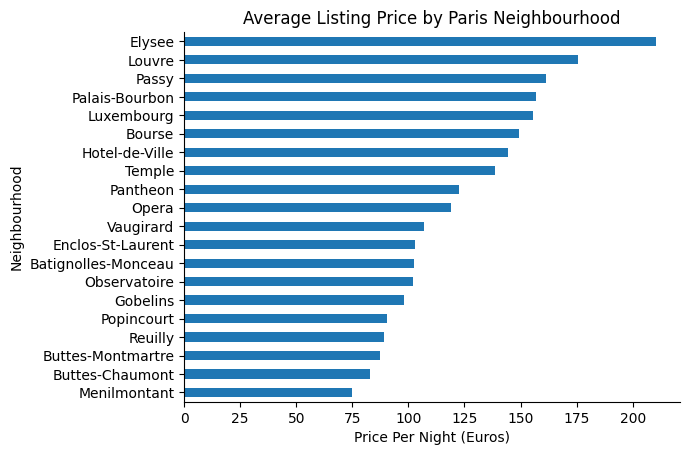

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighbourhood",
     xlabel="Price Per Night (Euros)",
     ylabel="Neighbourhood",
     legend=None
 )
)
sns.despine()

Building a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood

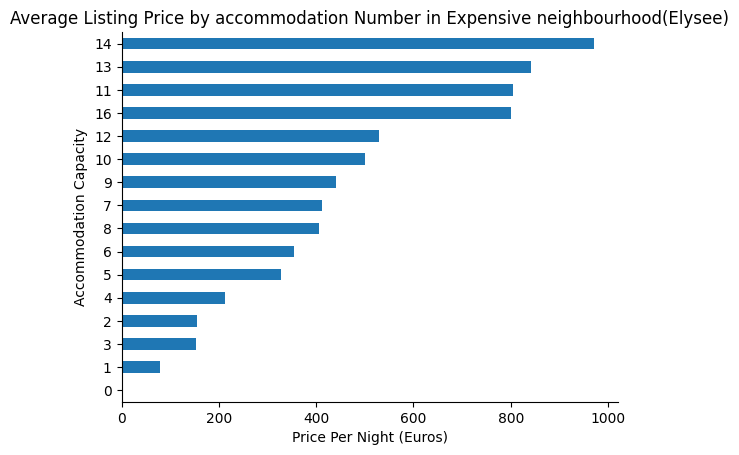

In [39]:
(Paris_listing_accommodates
 .plot
 .barh(
     title="Average Listing Price by accommodation Number in Expensive neighbourhood(Elysee)",
     xlabel="Price Per Night (Euros)",
     ylabel="Accommodation Capacity",
     legend=None
 )
)
sns.despine()

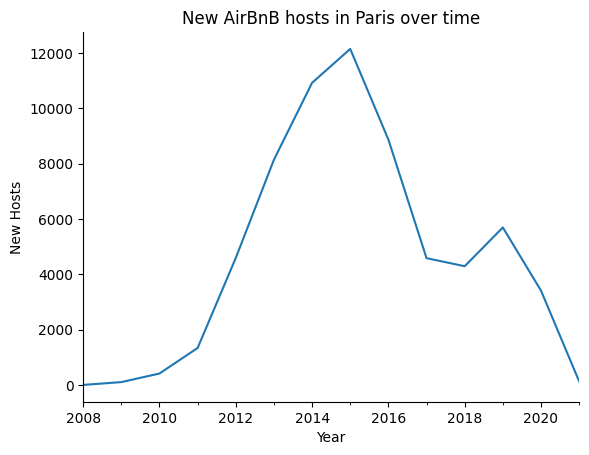

In [43]:
paris_listings_over_time['neighbourhood'].plot(
    title="New AirBnB hosts in Paris over time",
    xlabel="Year",
    ylabel="New Hosts"
)

sns.despine()

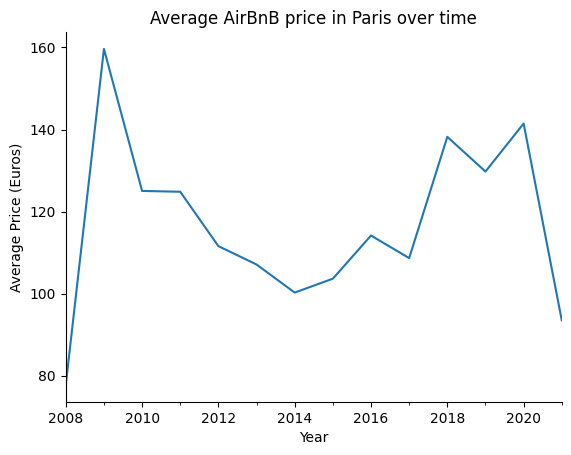

In [44]:
paris_listings_over_time['price'].plot(
    title="Average AirBnB price in Paris over time",
    xlabel="Year",
    ylabel="Average Price (Euros)"
)

sns.despine()

Text(0.5, 1.0, '2015 Regulations lead to Fewer New Hosts, Higher Prices')

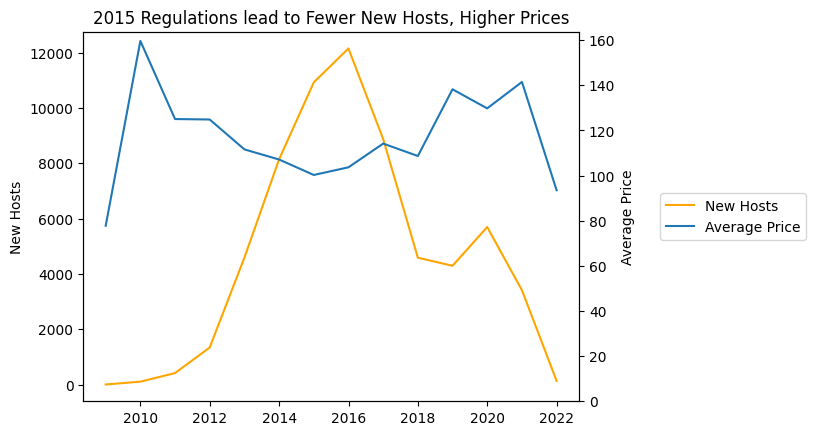

In [61]:
import matplotlib.pyplot as plt

# Creating the figure and axis for the first plot
fig, ax = plt.subplots()

# Plotting new hosts (primary y-axis)
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="orange"
)
ax.set_ylabel("New Hosts")

# Creating a secondary y-axis for average price
ax2 = ax.twinx()
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="center left", bbox_to_anchor=(1.15, 0.5))

ax.set_title("2015 Regulations lead to Fewer New Hosts, Higher Prices")
